In [4]:
# Install required library

!pip install sentence_transformers -q

In [17]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
null = None

In [7]:
# Job description for matching
job_description = """Looking for a candidate with expertise in Python, Machine Learning, NLP, and SQL. 
Must have experience in building predictive models and working with large datasets."""

In [8]:
  resumes = [{"Name": 'Steve SunA', 'Email': 'stevesun1245@gmail.com', 'Skills': ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Deep Learning', 'SQL', 'AI', 'Data Visualization', 'Statistical Analysis', 'Big Data', 'Critical Thinking', 'Storytelling'], 'Education': {'University': ['EDUCATION\nSkyline University'], 'Degree': ['Master of Science in Data Science'], 'GPA': ['3.81 GPA'], 'Start Date': ['August 2018'], 'End Date': ['May 2020']}, 'Experience': {'work': ['DataNova Insights\nData Scientist March 2021 – Present\n• Developed and deployed machine learning models to optimize customer retention, increasing\nengagement by 15%.\n• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business\ninsights.\n• Built scalable ETL pipelines to process large datasets using Python and SQL.\n• Collaborated with cross-functional teams to improve decision-making through predictive analytics.\nNeural Sphere Labs\nData Scientist June 2019 – December 2023\n• Designed and implemented deep learning models for image classification, improving accuracy by\n20%.\n• Automated data preprocessing and feature engineering workflows using Python and Pandas.\n• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).\n• Partnered with engineers to deploy ML models into production, ensuring seamless integration.']}}
    
    ,{'Name': 'Bharath Kumar', 'Email': 'bharathkumar1011@gmail.com', 'Skills': ['Modeling', 'Python', 'Analysis', 'Analyze', 'Engineering', 'Communication', 'Sql', 'Data quality', 'Data analysis', 'Programming', 'Jupyter', 'Statistical analysis', 'Analytics', 'Technical', 'Reports', 'Database', 'Pattern', 'Datasets', 'Etl', 'Excel'], 'Education': 'Education B.Tech in Aeronautical Engineering Institute of Aeronautical Engineering 2014 - 2018 GPA: 6.18/10', 'Experience': 'Results-driven Data Scientist with two years of experience in data analysis, predictive modeling, and data visualization. Passionate about leveraging data-driven insights to optimize business strategies and enhance decision-making processes. Experience Data Scientist XYZ Company, Hyderabad January 2022 - Present - Developed predictive models to analyze customer behavior and optimize business strategies. - Performed exploratory data analysis (EDA) and data cleaning to improve data quality. - Designed and maintained ETL pipelines to streamline data processing. - Collaborated with cross-functional teams to deliver data-driven insights. Junior Data Analyst ABC Analytics, Hyderabad January 2020 - December 2021 - Conducted statistical analysis and data visualization to support business decisions. - Created dashboards and reports using Excel and Python. - Assisted in implementing machine learning models for pattern recognition. - Worked with large datasets and ensured data integrity.'},
             {
  "Contact Information": {
    "Name": "Steve Sun",
    "Email": "stevesun1245@gmail.com",
    "Phone Number": "(123)456789",
    "Website/Portfolio/LinkedIn": "linkedin.com/in/stevesun",
    "Github Profile": null
  },
  "Education": [
    {
      "Institution Name": "Skyline University",
      "Degree": "Master of Science in Data Science",
      "Graduation Date": "May 2020",
      "GPA": "3.81"
    }
  ],
  "Experience": [
    {
      "Job Title": "Data Scientist",
      "Company Name": "DataNova Insights",
      "Location": "Hyderabad",
      "Dates of Employment": "March 2021 - Present",
      "Description": "Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics."
    },
    {
      "Job Title": "Data Scientist",
      "Company Name": "Neural Sphere Labs",
      "Location": null,
      "Dates of Employment": "June 2019 - December 2023",
      "Description": "Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML models into production, ensuring seamless integration."
    }
  ],
  "Skills": [
    "Python",
    "SQL",
    "Machine Learning",
    "AI",
    "Data Visualization",
    "Statistical Analysis",
    "Big Data",
    "Cloud Technologies",
    "Problem-Solving",
    "Critical Thinking",
    "Communication",
    "Storytelling"
  ]
},
    {
    "Name": "Steve Sun",
    "email": "stevesun1245@gmail.com",
    "phone": null,
    "website": null,
    "linkedin": "linkedin.com/in/stevesun",
    "github": null,
    "education": {
        "institution": "Skyline University",
        "degree": "Master of Science in Data Science",
        "graduationDate": "May 2020"
    },
    "experience": [
        {
            "title": "Data Scientist",
            "company": "DataNova Insights",
            "location": "Hyderabad",
            "dates": "March 2021 – Present",
            "description": "Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics."
        },
        {
            "title": "Data Scientist",
            "company": "Neural Sphere Labs",
            "location": "Hyderabad",
            "dates": "June 2019 – December 2023",
            "description": "Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML models into production, ensuring seamless integration."
        }
    ],
    "skills": [
        "Python",
        "SQL",
        "Machine Learning",
        "AI",
        "Data Visualization",
        "Statistical Analysis",
        "Big Data",
        "Cloud Technologies",
        "Problem-Solving",
        "Critical Thinking",
        "Communication",
        "Storytelling"]
            }
         
            ]

In [9]:
# Function Definitions

def normalize_text(data):
    """
    Recursively extract and combine text from nested dictionaries and lists.
    """
    if isinstance(data, str):
        return data
    elif isinstance(data, list):
        return " ".join(normalize_text(item) for item in data)
    elif isinstance(data, dict):
        return " ".join(normalize_text(value) for value in data.values())
    else:
        return str(data)

def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """
    Compute the percentage of skills that match the job description.
    """
    matched_skills = [skill for skill in skills if skill.lower() in job_description.lower()]
    return len(matched_skills) / len(skills) if skills else 0

In [10]:
def rank_candidates(resumes, job_description, model):
    """
    Rank candidates based on similarity scores for skills, education, and experience.
    """
    scores = []

    for resume in resumes:
        skills_text = normalize_text(resume.get("Skills", []))
        print(skills_text)
        experience_text = normalize_text(resume.get("Experience", {}))
        print(experience_text)
        education_text = normalize_text(resume.get("Education", {}))


        # Compute similarity scores
        skill_score = match_resume_to_job(skills_text, job_description, model)
        print(skill_score)
        experience_score = match_resume_to_job(experience_text, job_description, model)
        education_score = match_resume_to_job(education_text, job_description, model)
        keyword_match_score = compute_skill_match(resume.get("Skills", []), job_description)

        # Weighted total score
        total_score = 0.5 * skill_score + 0.4 * experience_score + 0.1 * education_score + 0.1 * keyword_match_score

        # Collect scores
        scores.append({
            "Name": resume.get("Name") or resume["Contact Information"]["Name"],
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_match_score,
            "Total Score": total_score
        })

    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)

In [19]:
def plot_scores(ranked_candidates):
    """
    Visualize the scores of candidates using a horizontal bar chart with ranking.
    """
    # Rank candidates based on Total Score (Descending Order)
    ranked_candidates = sorted(ranked_candidates, key=lambda x: x["Total Score"], reverse=True)
    
    # Add Rank to each candidate
    for idx, candidate in enumerate(ranked_candidates, start=1):
        candidate["Rank"] = idx
    
    # Prepare data (Convert scores to percentage)
    data = []
    for candidate in ranked_candidates:
        rank_name = f"{candidate['Rank']}. {candidate['Name']}"
        data.append(["Skills", rank_name, candidate["Skill Score"] * 100])
        data.append(["Experience", rank_name, candidate["Experience Score"] * 100])
        data.append(["Education", rank_name, candidate["Education Score"] * 100])
        data.append(["Keyword Match", rank_name, candidate["Keyword Match Score"] * 100])

    df = pd.DataFrame(data, columns=["Category", "Candidate", "Score"])
    
    # Define color palette
    palette = sns.color_palette("Set2", 4)

    # Create a grouped horizontal bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, y="Candidate", x="Score", hue="Category",palette=palette, orient="h")

    # Annotate bars with candidate names and percentage scores
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}%',  # Convert float to integer for clean formatting
                    (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black', weight='bold')

    # Customize labels and title
    plt.ylabel("Candidates (Ranked)", fontsize=12)
    plt.xlabel("Scores (%)", fontsize=12)
    plt.title("Candidate Score Comparison with Ranking", fontsize=14, fontweight='bold')

    # Add legend outside the plot for clarity
    plt.legend(title="Evaluation Criteria", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Remove grid lines to make it cleaner
    ax.grid(False)

    # Show plot
    plt.tight_layout()
    plt.show()


In [12]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Python Data Analysis Machine Learning Communication Deep Learning SQL AI Data Visualization Statistical Analysis Big Data Critical Thinking Storytelling
DataNova Insights
Data Scientist March 2021 – Present
• Developed and deployed machine learning models to optimize customer retention, increasing
engagement by 15%.
• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business
insights.
• Built scalable ETL pipelines to process large datasets using Python and SQL.
• Collaborated with cross-functional teams to improve decision-making through predictive analytics.
Neural Sphere Labs
Data Scientist June 2019 – December 2023
• Designed and implemented deep learning models for image classification, improving accuracy by
20%.
• Automated data preprocessing and feature engineering workflows using Python and Pandas.
• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).
• Partnered with engineers to deploy ML models into

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5235879421234131


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Modeling Python Analysis Analyze Engineering Communication Sql Data quality Data analysis Programming Jupyter Statistical analysis Analytics Technical Reports Database Pattern Datasets Etl Excel
Results-driven Data Scientist with two years of experience in data analysis, predictive modeling, and data visualization. Passionate about leveraging data-driven insights to optimize business strategies and enhance decision-making processes. Experience Data Scientist XYZ Company, Hyderabad January 2022 - Present - Developed predictive models to analyze customer behavior and optimize business strategies. - Performed exploratory data analysis (EDA) and data cleaning to improve data quality. - Designed and maintained ETL pipelines to streamline data processing. - Collaborated with cross-functional teams to deliver data-driven insights. Junior Data Analyst ABC Analytics, Hyderabad January 2020 - December 2021 - Conducted statistical analysis and data visualization to support business decisions. - C

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5392239093780518


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Python SQL Machine Learning AI Data Visualization Statistical Analysis Big Data Cloud Technologies Problem-Solving Critical Thinking Communication Storytelling
Data Scientist DataNova Insights Hyderabad March 2021 - Present Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics. Data Scientist Neural Sphere Labs None June 2019 - December 2023 Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML model

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0.5074076652526855


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

-0.041276559233665466


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}, Total Score: {candidate['Total Score']:.2f}")

Name: Steve SunA, Total Score: 0.57
Name: Steve Sun, Total Score: 0.52
Name: Bharath Kumar, Total Score: 0.52
Name: Steve Sun, Total Score: -0.04


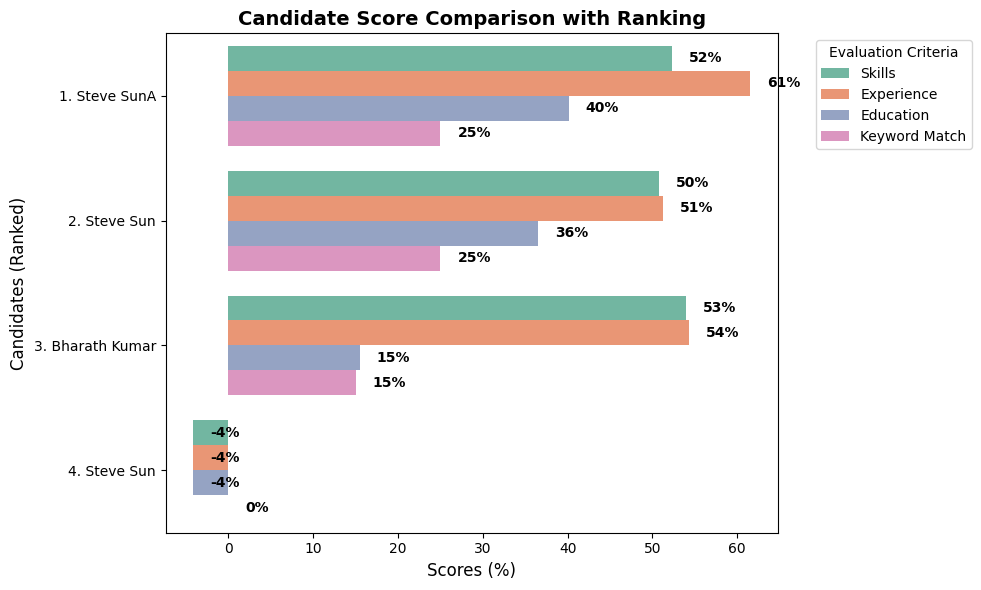

In [20]:
# Plot the scores
plot_scores(ranked_candidates)